In [3]:
import warnings
warnings.filterwarnings("ignore")
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
from mutagen.wave import WAVE
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from pydub.silence import split_on_silence
from pydub import AudioSegment, effects 
from scipy.io.wavfile import read, write

from sklearn.preprocessing import OneHotEncoder

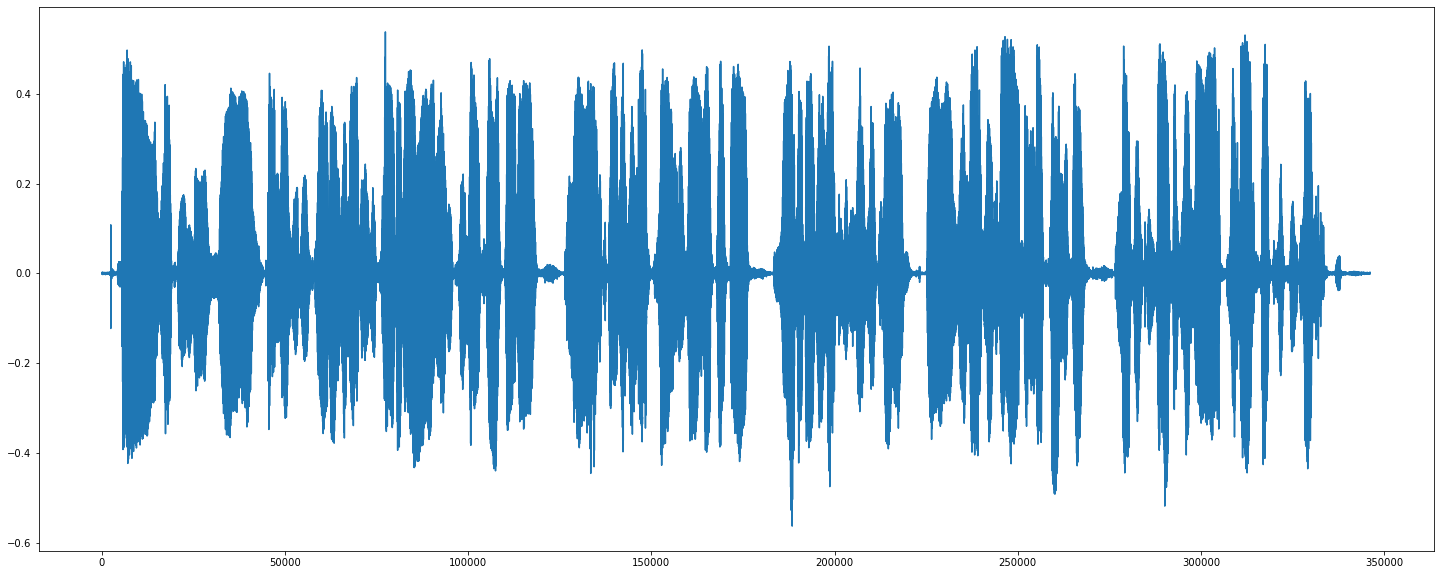

In [2]:
# Class: English
filename = '/Users/nada./Desktop/Bootcamp/Projects/Our_Final_Project/en/_e4fgbYJsYM__U__S1---0228.380-0244.080.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename)
plt.figure(figsize=(25, 10))
plt.plot(librosa_audio);

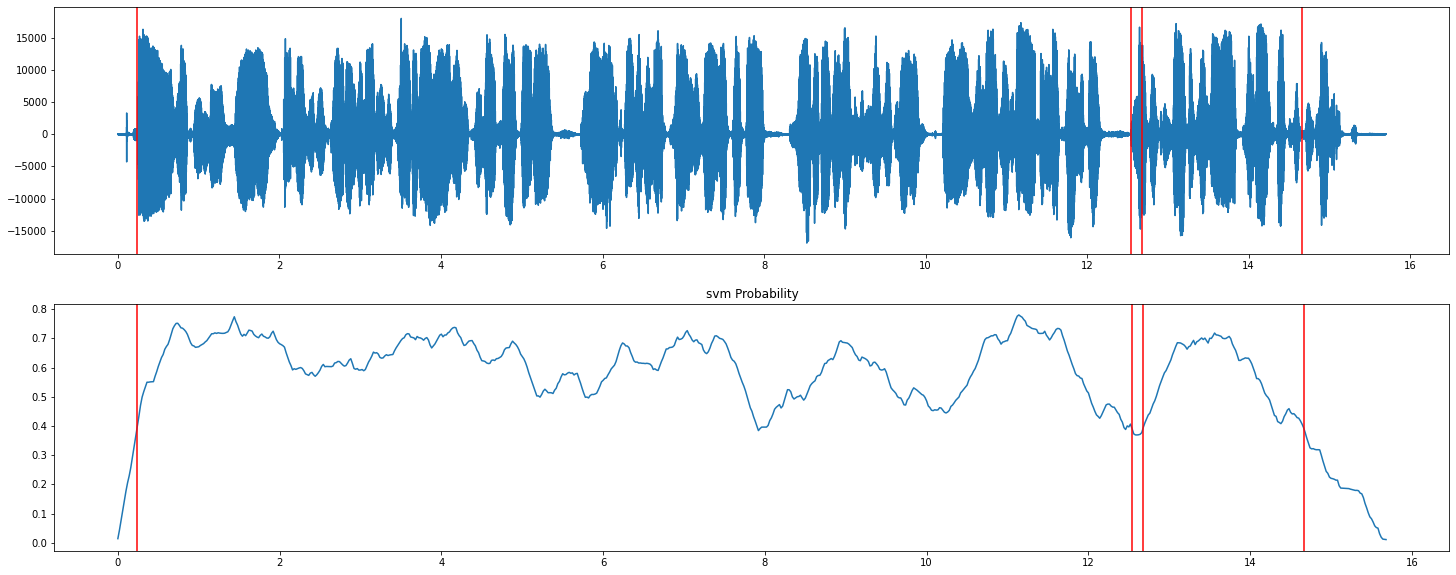

In [3]:
# path to audio file
# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(filename)
plt.figure(figsize=(25, 10))
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

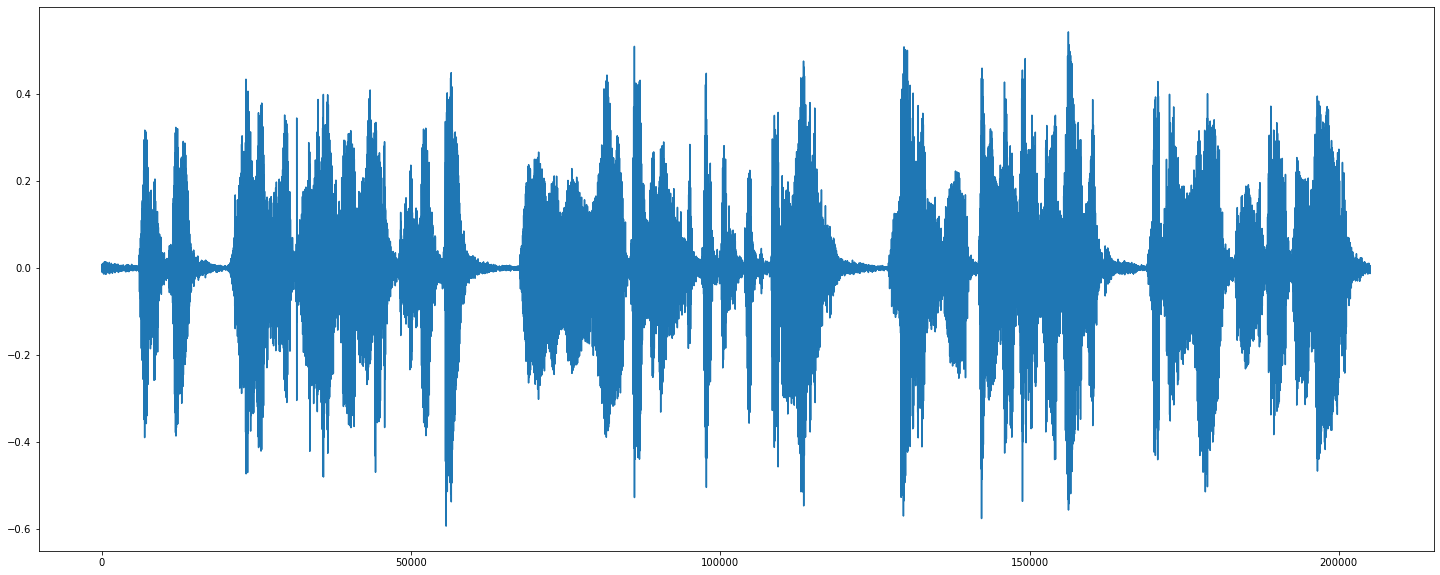

In [4]:
# Class: Arabic
filename = '/Users/nada./Desktop/Bootcamp/Projects/Our_Final_Project/ar/_73h_mgRMGU__U__S0---0115.460-0124.760.wav'
librosa_audio, librosa_sample_rate = librosa.load(filename) 
scipy_sample_rate, scipy_audio = wav.read(filename)
plt.figure(figsize=(25, 10))
plt.plot(librosa_audio);

## Get all audio files in Dataframe with its label (The language)

## English

In [39]:
dfEn = pd.read_csv('english_df.csv')

In [ ]:
Fname = []
# return all files as a list
for file in os.listdir(r'en/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'en/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'en/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'en/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [ ]:
dfEn = pd.DataFrame (Fname, columns = ['name'])
dfEn['class_name'] = 'English'
dfEn.head()

In [37]:
dfEn.shape

(8533, 2)

In [ ]:
dfEn.to_csv('english_df.csv', index=False)

## Arabic

In [5]:
Fname = []
# return all files as a list
for file in os.listdir(r'ar/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'ar/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'ar/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'ar/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [6]:
dfAr = pd.DataFrame (Fname, columns = ['name'])
dfAr['class_name'] = 'Arabic'
dfAr.head()

,name,class_name
0,Co57X8B6Tvs__U__S102---0355.800-0368.650.wav,Arabic
1,aIipDS4OQ2c__U__S31---0216.370-0232.020.wav,Arabic
2,CP0JrlvC6rM__U__S47---0411.110-0421.900.wav,Arabic
3,0PWJ-UYv-ys__U__S17---0074.970-0087.380.wav,Arabic
4,GyypH9HLpEs__U__S331---2076.300-2089.240.wav,Arabic


In [7]:
dfAr.shape

(9216, 2)

In [8]:
dfAr.to_csv('arabic_df.csv', index=False)

## Korean

In [9]:
Fname = []
# return all files as a list
for file in os.listdir(r'ko/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'ko/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'ko/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'ko/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [10]:
dfKo = pd.DataFrame (Fname, columns = ['name'])
dfKo['class_name'] = 'Korean'
dfKo.head()

,name,class_name
0,z6B2GrcqUvM__U__S0---0176.100-0192.090.wav,Korean
1,tO1xkcNbsB4__U__S103---0473.100-0483.500.wav,Korean
2,fqv7wkunopk__U__S100---1854.210-1866.660.wav,Korean
3,Hfj6C893PMc__U__S0---0382.790-0401.400.wav,Korean
4,T9dfFfeFJlA__U__S0---0275.200-0288.980.wav,Korean


In [11]:
dfKo.shape

(11073, 2)

In [12]:
dfKo.to_csv('korean_df.csv', index=False)

## Japanese 

In [21]:
Fname = []
# return all files as a list
for file in os.listdir(r'ja/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'ja/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'ja/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'ja/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [22]:
dfJa = pd.DataFrame (Fname, columns = ['name'])
dfJa['class_name'] = 'Japanese'
dfJa.head()

,name,class_name
0,HWJpAxevpkg__U__S1---0386.100-0399.820.wav,Japanese
1,ypIp_FM7rPs__U__S12---0089.610-0109.260.wav,Japanese
2,posunnHFpN4__U__S1---0169.370-0187.120.wav,Japanese
3,CEX0yciDKYw__U__S282---1696.760-1711.940.wav,Japanese
4,1ycN4wvzBts__U__S1---0094.510-0104.600.wav,Japanese


In [23]:
dfJa.shape

(8035, 2)

In [24]:
dfJa.to_csv('japanese_df.csv', index=False)

## Turkish

In [25]:
Fname = []
# return all files as a list
for file in os.listdir(r'tr/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'tr/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'tr/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'tr/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [26]:
dfTr = pd.DataFrame (Fname, columns = ['name'])
dfTr['class_name'] = 'Turkish'
dfTr.head()

,name,class_name
0,3VwxgGV6icE__U__S113---0557.120-0571.980.wav,Turkish
1,HLUxZ97rAZc__U__S11---0511.280-0530.670.wav,Turkish
2,BG6pah6_7BU__U__S15---0161.900-0177.740.wav,Turkish
3,JvgqlZQt6ns__U__S11---0062.090-0072.980.wav,Turkish
4,5D4OAfte1Xg__U__S11---0324.610-0343.910.wav,Turkish


In [27]:
dfTr.shape

(8838, 2)

In [28]:
dfTr.to_csv('turkish_df.csv', index=False)

## Spanish

In [29]:
Fname = []
# return all files as a list
for file in os.listdir(r'es/'):
    
    # check the files which are end with specific extension
    if file.endswith(".wav"):
        
        # check the files which are its duration greater than 10 seconds
        samplerate, data = read(r'es/'+file)
        duration = len(data)/samplerate
        
        if duration < 10:
            continue
        
        else:
            #Note the processed audio rate is not the same - it would be 1K
            [Fs, x] = aIO.read_audio_file(r'es/'+file)
            segments = aS.silence_removal(x, 
                                 Fs, 
                                 0.020, 
                                 0.020, 
                                 smooth_window=1.0, 
                                 weight=0.3)
            # audio length
            samplerate, data = read(r'es/'+file)
            # Duration of the audio in Seconds
            duration = len(data)/samplerate
            silence=0
            arrLen= len(segments)
            for i in range(arrLen-1):
                if  i > arrLen-1:
                    break;
                else:
                    silence=silence+(segments[i+1][0]-segments[i][1])
            silence= silence+(duration-segments[arrLen-1][1])
            if silence/duration < 0.50:
            # print path name of selected files
                Fname.append(file)

In [30]:
dfSp = pd.DataFrame (Fname, columns = ['name'])
dfSp['class_name'] = 'Spanish'
dfSp.head()

,name,class_name
0,CFJoUTffiTE__U__S102---0514.300-0525.870.wav,Spanish
1,KhxyzoGajzk__U__S24---0083.660-0102.450.wav,Spanish
2,8EooNSe0oA4__U__S114---0019.710-0033.130.wav,Spanish
3,97y8hIPuKf0__U__S1---0444.060-0463.540.wav,Spanish
4,tm4qk4c3wK0__U__S159---0750.940-0766.680.wav,Spanish


In [31]:
dfSp.shape

(6667, 2)

In [32]:
dfSp.to_csv('spanish.csv', index=False)

# Extract Features for every file (Mel-Frequency Cepstral Coefficients (MFCC))

In [42]:
max_pad_len = 1000

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

## English

In [45]:
fulldatasetpath = 'en/'

metadata = dfEn 

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [46]:
# Convert into a Panda dataframe 
dfEn['featurePadding'] = features
print('Finished feature extraction from ', len(dfEn), ' English files') 

Finished feature extraction from  8533  English files


In [50]:
dfEn.head()

,name,class_name,featurePadding
0,5Jr_iCUJJpQ__U__S336---2805.850-2824.230.wav,English,"[[[-236.3834, -240.74864, -286.81854, -335.919..."
1,dwAr2ECXbkE__U__S109---0475.980-0491.120.wav,English,"[[[-395.29422, -360.03094, -356.22986, -353.71..."
2,eK8S51L8juo__U__S0---0332.860-0346.620.wav,English,"[[[-579.48895, -560.9052, -566.01465, -563.854..."
3,g-v6UDIsHU4__U__S0---0417.970-0437.630.wav,English,"[[[-525.4768, -499.51846, -497.19257, -494.404..."
4,Yg2RFV6oEtU__U__S20---0245.390-0261.750.wav,English,"[[[-354.51477, -338.15552, -345.86176, -348.24..."


In [51]:
dfEn.to_csv('english_df.csv', index=False)

## Arabic

In [53]:
fulldatasetpath = 'ar/'

metadata = dfAr 

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [54]:
# Convert into a Panda dataframe 
dfAr['featurePadding'] = features
print('Finished feature extraction from ', len(dfAr), ' Arabic files') 

Finished feature extraction from  9216  Arabic files


In [55]:
dfAr.head()

,name,class_name,featurePadding
0,Co57X8B6Tvs__U__S102---0355.800-0368.650.wav,Arabic,"[[[-445.52887, -431.417, -425.64957, -425.6002..."
1,aIipDS4OQ2c__U__S31---0216.370-0232.020.wav,Arabic,"[[[-519.2706, -514.4043, -514.449, -515.2433, ..."
2,CP0JrlvC6rM__U__S47---0411.110-0421.900.wav,Arabic,"[[[-526.5613, -489.97736, -480.0966, -470.3475..."
3,0PWJ-UYv-ys__U__S17---0074.970-0087.380.wav,Arabic,"[[[-291.93204, -273.22742, -275.80392, -269.83..."
4,GyypH9HLpEs__U__S331---2076.300-2089.240.wav,Arabic,"[[[-70.14472, -103.15895, -116.857635, -108.52..."


In [56]:
dfAr.to_csv('arabic_df.csv', index=False)

## Korean

In [59]:
fulldatasetpath = 'ko/'

metadata = dfKo 

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [60]:
# Convert into a Panda dataframe 
dfKo['featurePadding'] = features
print('Finished feature extraction from ', len(dfKo), ' Korean files') 

Finished feature extraction from  11073  Korean files


In [61]:
dfKo.head()

,name,class_name,featurePadding
0,z6B2GrcqUvM__U__S0---0176.100-0192.090.wav,Korean,"[[[-337.1428, -315.31598, -320.33966, -326.148..."
1,tO1xkcNbsB4__U__S103---0473.100-0483.500.wav,Korean,"[[[-411.41278, -387.64124, -389.1636, -385.490..."
2,fqv7wkunopk__U__S100---1854.210-1866.660.wav,Korean,"[[[-649.7472, -637.6825, -638.4699, -640.13654..."
3,Hfj6C893PMc__U__S0---0382.790-0401.400.wav,Korean,"[[[-346.15674, -287.54584, -290.74844, -323.01..."
4,T9dfFfeFJlA__U__S0---0275.200-0288.980.wav,Korean,"[[[-370.32172, -369.05612, -410.87262, -433.15..."


In [66]:
dfKo.to_csv('korean_df.csv', index=False)

## Japanese

In [63]:
fulldatasetpath = 'ja/'

metadata = dfJa

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [64]:
dfJa['featurePadding'] = features
print('Finished feature extraction from ', len(dfJa), ' Japanese files') 

Finished feature extraction from  8035  Japanese files


In [65]:
dfJa.head()

,name,class_name,featurePadding
0,HWJpAxevpkg__U__S1---0386.100-0399.820.wav,Japanese,"[[[-482.03732, -458.39206, -461.35205, -469.09..."
1,ypIp_FM7rPs__U__S12---0089.610-0109.260.wav,Japanese,"[[[-490.49344, -501.16165, -435.78598, -315.74..."
2,posunnHFpN4__U__S1---0169.370-0187.120.wav,Japanese,"[[[-662.52136, -662.52136, -662.52136, -662.52..."
3,CEX0yciDKYw__U__S282---1696.760-1711.940.wav,Japanese,"[[[-426.85135, -400.93704, -401.8635, -400.214..."
4,1ycN4wvzBts__U__S1---0094.510-0104.600.wav,Japanese,"[[[-651.9767, -651.9767, -651.9767, -651.9767,..."


In [70]:
dfJa.to_csv('japanese_df.csv', index=False)

## Turkish

In [75]:
fulldatasetpath = 'tr/'

metadata = dfTr

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [76]:
dfTr['featurePadding'] = features
print('Finished feature extraction from ', len(dfTr), ' Turkish files') 

Finished feature extraction from  8838  Turkish files


In [77]:
dfTr.head()

,name,class_name,featurePadding
0,3VwxgGV6icE__U__S113---0557.120-0571.980.wav,Turkish,"[[[-444.94214, -422.73825, -420.40704, -417.38..."
1,HLUxZ97rAZc__U__S11---0511.280-0530.670.wav,Turkish,"[[[-431.13245, -420.98282, -427.18054, -429.92..."
2,BG6pah6_7BU__U__S15---0161.900-0177.740.wav,Turkish,"[[[-164.088, -171.36533, -234.37628, -301.4308..."
3,JvgqlZQt6ns__U__S11---0062.090-0072.980.wav,Turkish,"[[[-525.5991, -495.4286, -494.38278, -497.9449..."
4,5D4OAfte1Xg__U__S11---0324.610-0343.910.wav,Turkish,"[[[-283.20184, -257.3172, -263.4428, -269.3120..."


In [78]:
dfTr.to_csv('turkish_df.csv', index=False)

## Spanish

In [67]:
fulldatasetpath = 'es/'

metadata = dfSp

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])

In [68]:
dfSp['featurePadding'] = features
print('Finished feature extraction from ', len(dfSp), ' Spanish files')

Finished feature extraction from  6667  Spanish files


In [69]:
dfSp.head()

,name,class_name,featurePadding
0,CFJoUTffiTE__U__S102---0514.300-0525.870.wav,Spanish,"[[[-228.45052, -257.57077, -306.05264, -305.46..."
1,KhxyzoGajzk__U__S24---0083.660-0102.450.wav,Spanish,"[[[-284.52573, -260.0623, -258.35535, -259.706..."
2,8EooNSe0oA4__U__S114---0019.710-0033.130.wav,Spanish,"[[[-173.25906, -169.08517, -188.50818, -192.61..."
3,97y8hIPuKf0__U__S1---0444.060-0463.540.wav,Spanish,"[[[-408.93604, -394.385, -397.54968, -401.2442..."
4,tm4qk4c3wK0__U__S159---0750.940-0766.680.wav,Spanish,"[[[-569.29834, -552.13806, -550.11896, -529.93..."


In [71]:
dfSp.to_csv('spanish.csv', index=False)

# Feature extration (numpy array)

## without padding 

In [4]:
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

In [19]:
dfTr=pd.read_csv('turkish_df.csv')

In [7]:
fulldatasetpath = r'd:/AudiosFiles/tr/'

metadata = dfTr.head()

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append(data)

In [8]:
np.save('tr.npy', features)

In [10]:
new_num_arr = np.load('tr.npy') # load

In [11]:
new_num_arr.shape

(5, 40)

In [13]:
features = []
ll=len(new_num_arr-1)
for i in range(ll) :
    features.append(new_num_arr[i])
    

data = {'feature':features}

dfTr = pd.DataFrame (data)

In [14]:
dfTr

,feature
0,"[-285.34222, 147.04837, 10.427363, 48.675816, ..."
1,"[-261.67053, 137.72911, 0.974875, 53.205902, 1..."
2,"[-241.9859, 124.85667, -37.97344, 58.21001, -1..."
3,"[-279.2769, 106.38721, -53.04679, 45.060993, -..."
4,"[-190.65404, 164.01906, -34.948177, 49.64423, ..."


## with padding

In [17]:
dfTr=pd.read_csv('turkish_df.csv')

In [12]:
def extract_features_Padding(file_name):
    max_pad_len = 1000

    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
     
    return mfccs

In [20]:
fulldatasetpath = r'd:/AudiosFiles/tr/'

metadata = dfTr.head()

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features_Padding(file_name)
    features.append(data)

In [21]:
np.save('tep.npy', features)

In [22]:
new_num_arr = np.load('tep.npy') # load

In [23]:
new_num_arr.shape

(5, 40, 1000)

In [26]:
features = []
ll=len(new_num_arr-1)
for i in range(ll) :
    features.append(new_num_arr[i])
    

data = {'feature':features}

dfTr = pd.DataFrame (data)

In [27]:
dfTr

,feature
0,"[[-444.94214, -422.73825, -420.40704, -417.381..."
1,"[[-431.13245, -420.98282, -427.18054, -429.920..."
2,"[[-164.088, -171.36533, -234.37628, -301.43088..."
3,"[[-525.5991, -495.4286, -494.38278, -497.94498..."
4,"[[-283.20184, -257.3172, -263.4428, -269.31204..."
